# Dask for larger-than-memory problems

The objective of this tutorial is to give a brief example of how to use [dask](https://www.dask.org/), a Python package for scaled computing. The content is based on [this dask tutorial](https://examples.dask.org/machine-learning/svd.html), with extra explanations added for clarity/education purposes.

The requirements to run the notebook are:
 * numpy
 * dask[distributed]
 * bokeh
 * setting up graphviz (optional: only used when visualizing the task graph)

## The computational task

Consider the situation where you have 2 million data samples of 1000 variables of interest. You need to perform an analysis that can reduce the dimensionality of the data, called a *principle component analysis*. This is typically done with a Singular Value Decomposition (SVD).

What happens if we try to allocate memory for our data?

In [3]:
import numpy as np

data = np.random.rand(2_000_000, 1_000)

MemoryError: Unable to allocate 14.9 GiB for an array with shape (2000000, 1000) and data type float64

We get a memory error! We can't even hold our data in memory, let alone perform any computations on it. And the SVD algorithm is complicated, so manually splitting the data into chunks and performing the calculation is infeasible.

This is where packages like dask can be useful.

## SVD with dask

The dask library defines objects similar to numpy arrays, pandas dataframes, and other well-known Python objects, but has changed the underlying logic to allow easy parallelization. In this tutorial, we will use `dask.array`, which is dask's version of `numpy.array`. Dask also includes an SVD algorithm that works with their dask array object to seamlessly integrate chunking of the array.


### Step 1: Set up the Dask Client for Dashboard

The dask Client is like a mini-cluster, and it comes with a nice dashboard that can give you insight into how dask is spinning up threads and processes.

Starting the Dask Client is optional.  It will provide a dashboard which is useful to gain insight on the computation.  

The link to the dashboard will become visible when you create the client below.  We recommend having it open on one side of your screen while using your notebook on the other side.  This can take some effort to arrange your windows, but seeing them both at the same is very useful when learning.

In [4]:
from dask.distributed import Client, progress

# start a multithreaded dask client with 4 threads
client = Client(processes=False, threads_per_worker=4,
                n_workers=1, memory_limit='2GB')

client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://172.16.1.96:8787/status,
Dashboard: http://172.16.1.96:8787/status,Workers: 1
Total threads: 4,Total memory: 1.86 GiB
Status: running,Using processes: False
Comm: inproc://172.16.1.96/14128/1,Workers: 1
Dashboard: http://172.16.1.96:8787/status,Total threads: 4
Started: Just now,Total memory: 1.86 GiB
Comm: inproc://172.16.1.96/14128/4,Total threads: 4
Dashboard: http://172.16.1.96:53297/status,Memory: 1.86 GiB
Nanny: None,


Once you set up a client, all subsequent computations in the notebook/module will be performed using the specified architecture.

### Step 2: Set up problem and visualize task graph

For many applications the provided matrix has many more rows than columns.  In this case a specialized algorithm can be used.

Dask arrays have what is called "lazy evaluation". This means that you set up your problem and dask prepares the code for solving the problem but does not actually compute anything until you call `.compute()`.

In [5]:
import dask.array as da

X = da.random.random((200_000, 1_000), chunks=(10_000, 1_000)).persist()

Note that in initializing the dask array, we have specified a size of the chunks that we want to divide the array into.

**Question for the reader!** Given the array dimensions and chunk size above, how many chunks do we have in our array?

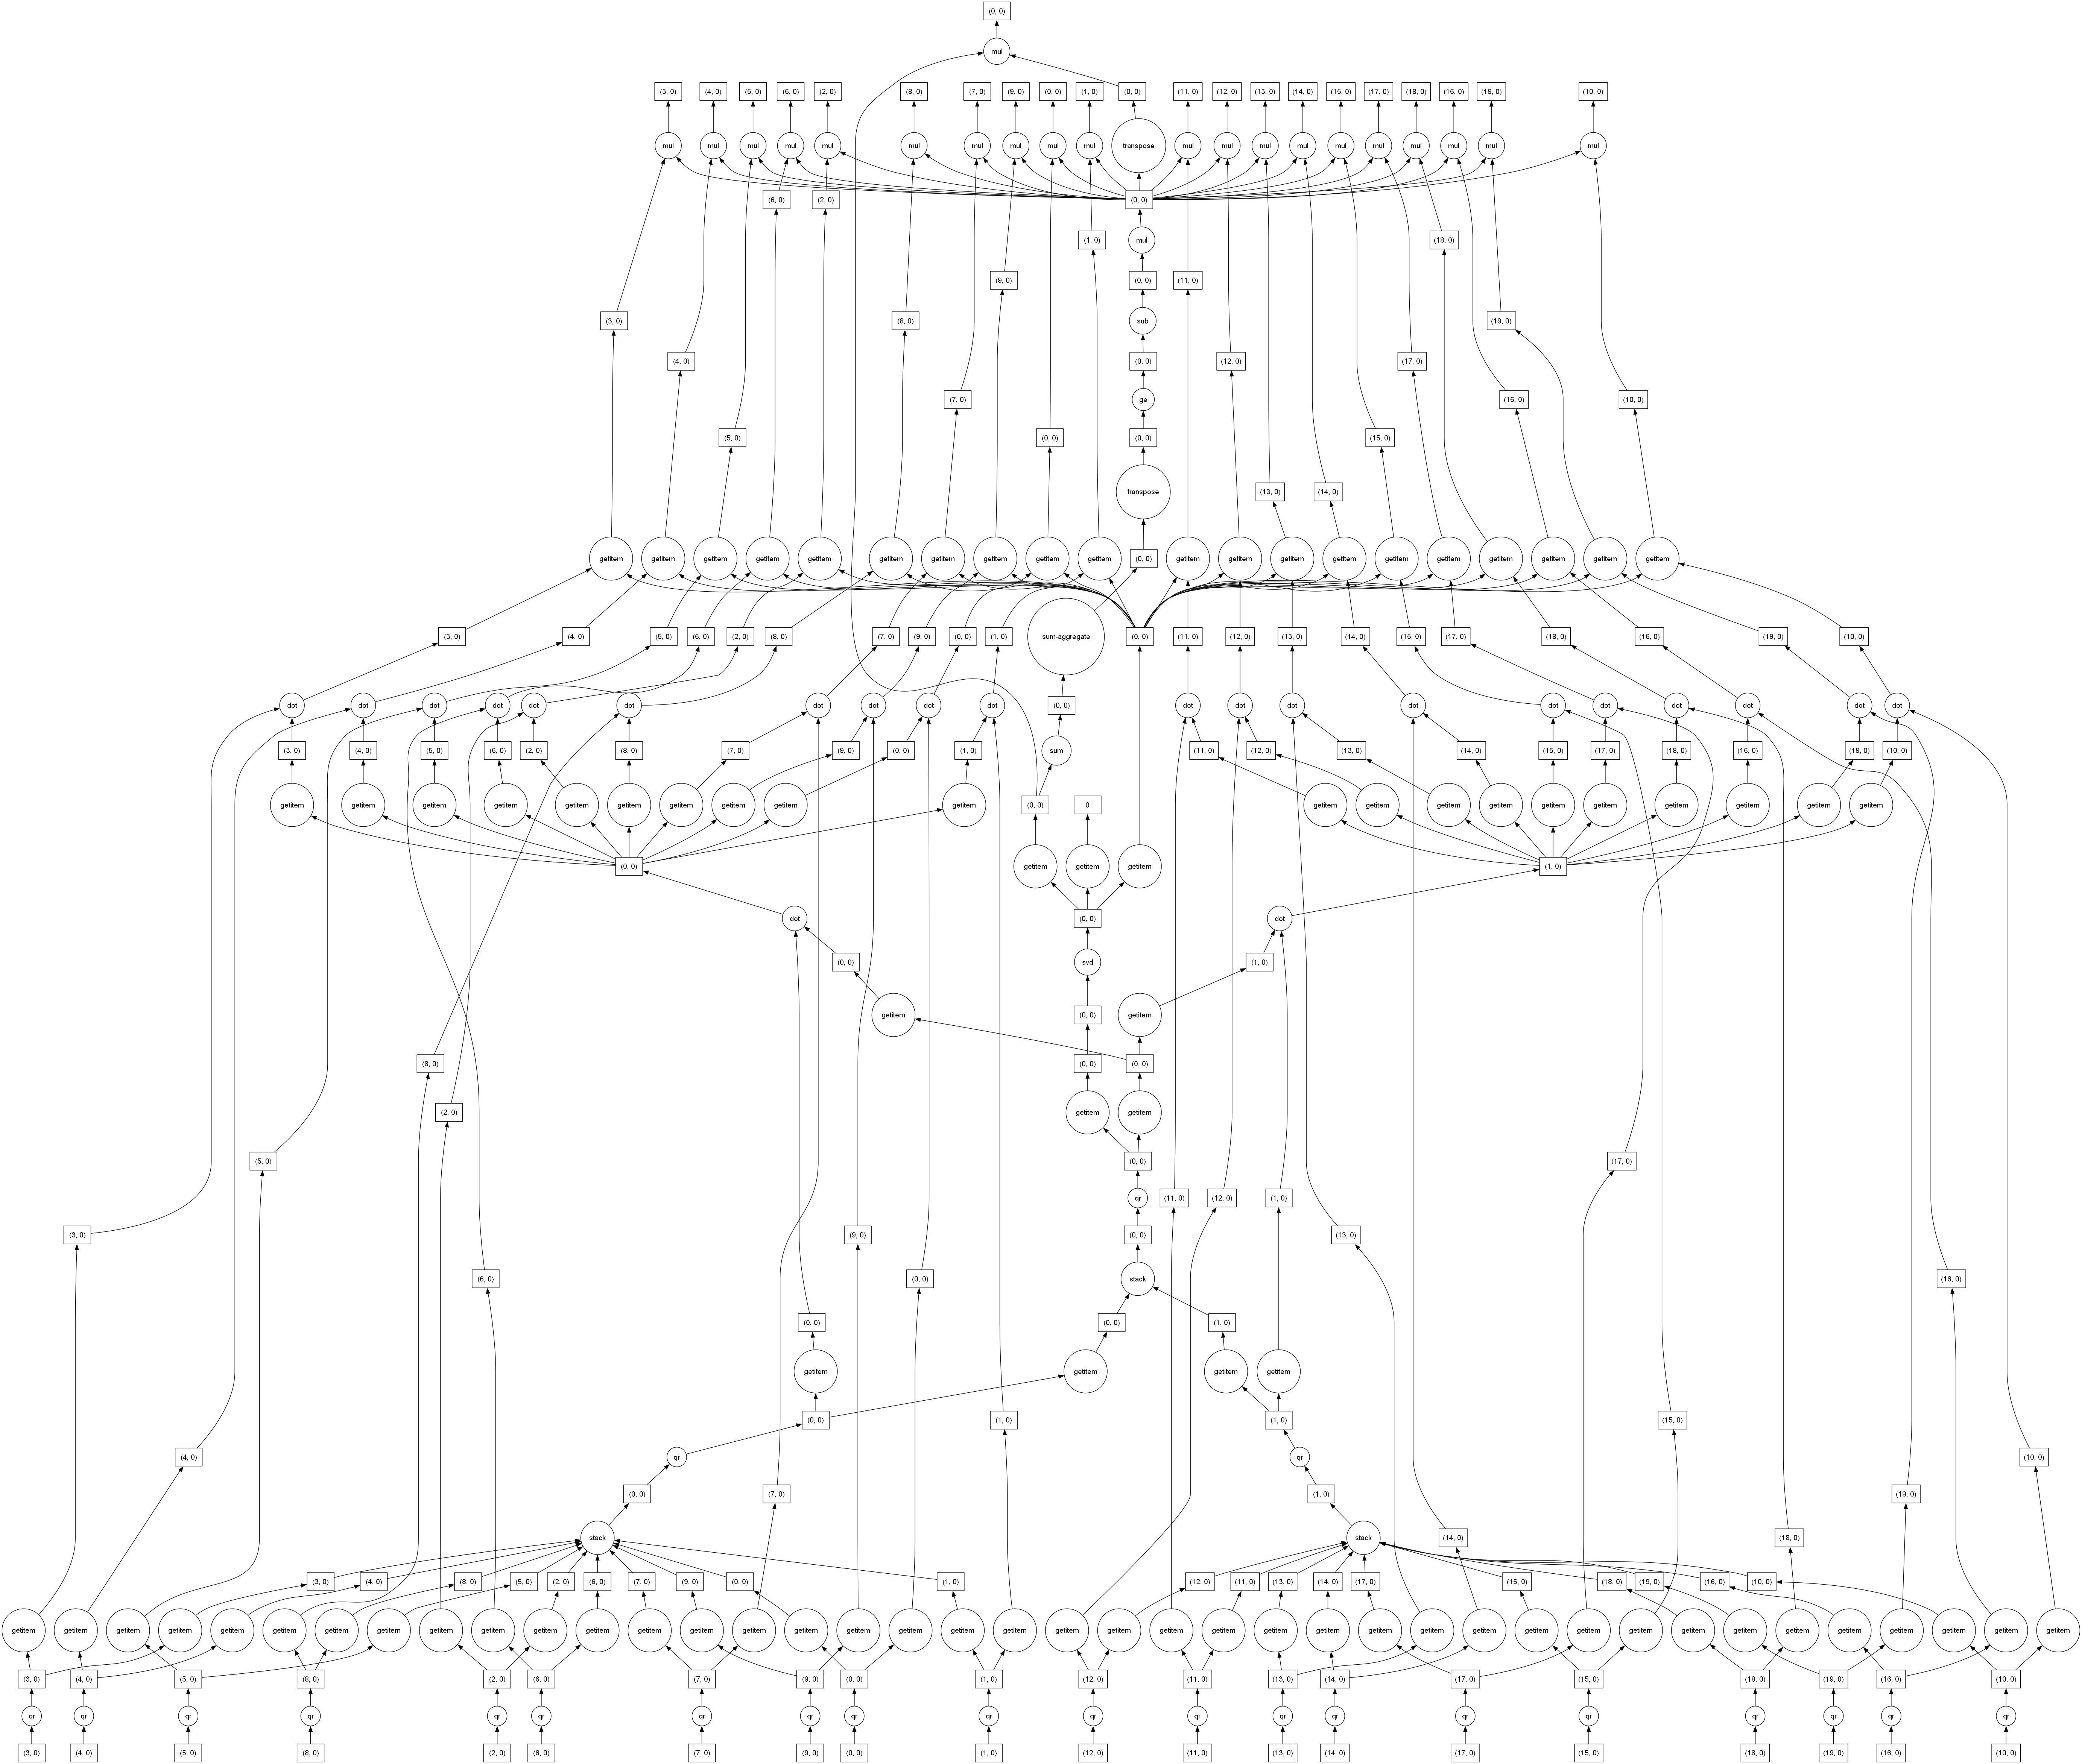

In [6]:
import dask

u, s, v = da.linalg.svd(X)
dask.visualize(u, s, v)

### Compute the singular value decomposition

Now that we have set up our problem, it is time to compute the SVD. Keep an eye on the dask client to see the computational effort of the 4 workers.

In [ ]:
type(u)

In [12]:
dask.compute(u, s, v)

2023-06-29 12:20:36,430 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.35 GiB -- Worker memory limit: 1.86 GiB
2023-06-29 12:20:46,760 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.35 GiB -- Worker memory limit: 1.86 GiB
2023-06-29 12:20:56,850 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- U

(array([[ 2.17534053e-03, -2.60163002e-03,  9.20403030e-05, ...,
          2.97298989e-04, -8.19887791e-04,  1.36838188e-03],
        [ 2.30792308e-03,  3.09671129e-03,  1.02814565e-03, ...,
          9.98634523e-04,  1.04945849e-03,  4.13519396e-04],
        [ 2.16415406e-03,  2.92510767e-03,  1.32141687e-03, ...,
          4.03580320e-03,  4.11008386e-03, -6.62296952e-04],
        ...,
        [ 2.22964274e-03,  1.24122900e-03, -6.37391031e-04, ...,
          2.83929279e-04,  1.15935109e-03,  9.51948810e-04],
        [ 2.29144127e-03, -1.68410985e-03,  1.50352043e-03, ...,
          1.03756689e-03,  2.57120828e-03, -3.62785334e-03],
        [ 2.25864807e-03, -5.29307175e-03, -3.36771084e-04, ...,
         -8.77693509e-04,  1.31688560e-03,  8.47925888e-05]]),
 array([7071.99315093,  138.24279844,  138.0814158 ,  137.97347064,
         137.96379159,  137.86098225,  137.82928123,  137.80102951,
         137.72127573,  137.65457212,  137.59117292,  137.58765921,
         137.54864475,  1

2023-06-29 12:22:10,049 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.67 GiB -- Worker memory limit: 1.86 GiB
2023-06-29 12:22:20,159 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.67 GiB -- Worker memory limit: 1.86 GiB
2023-06-29 12:22:30,259 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- U

In [13]:
u.shape

(200000, 1000)

2023-06-29 12:24:30,869 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.67 GiB -- Worker memory limit: 1.86 GiB
2023-06-29 12:24:40,980 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.67 GiB -- Worker memory limit: 1.86 GiB
2023-06-29 12:24:51,079 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- U

In [15]:
client.close()